In [84]:
#Load libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from fancyimpute import KNN
%matplotlib inline

In [85]:
#For maximizing Cell width of Jupyter Notebook Cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [86]:
#Set working directory
os.chdir("D:\Shad_Data\Edwisor\Projects\BikeRentalProject")

In [87]:
#Load data
bike_df = pd.read_csv("day.csv", encoding = "ISO-8859-1" ,sep = ',', index_col = 0)

In [88]:
#Display Top 5 records from dataframe
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [89]:
#Describe Columns of Dataframe
bike_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


## Missing Value Analysis


In [90]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(bike_df.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(bike_df))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Missing_perc.csv", index = False)

#Display missing_val
missing_val

# As displayed below, there are no null values present, hence no Mean/Median Imputation or KNN imputation is required #

,Variables,Missing_percentage
0,dteday,0.0
1,season,0.0
2,yr,0.0
3,mnth,0.0
4,holiday,0.0
5,weekday,0.0
6,workingday,0.0
7,weathersit,0.0
8,temp,0.0
9,atemp,0.0


# Exploratory Data Analysis


In [91]:
#Get Structure of data
bike_df.dtypes


dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [92]:
# Get Shape of Data
bike_df.shape

(731, 15)

In [93]:
################# Converting appropriate required Datatypes ####################

#Converting colmnns into categorical factors as they contain unqiue values
category_column_names = ['season','yr','mnth','holiday','weekday','weathersit', 'workingday']
for i in category_column_names :
    bike_df[i] = bike_df[i].astype('category')

#Converting date into datetime format
bike_df['dteday'] = pd.to_datetime(bike_df['dteday'],yearfirst=True)

#Converting rest variables into float64 for standardization
for i in range(0, bike_df.shape[1]):
    if(bike_df.iloc[:,i].dtype == 'int64'):
        bike_df.iloc[:,i] = bike_df.iloc[:,i].astype('float')


info = bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
dteday        731 non-null datetime64[ns]
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null float64
cnt           731 non-null float64
dtypes: category(7), datetime64[ns](1), float64(7)
memory usage: 57.7 KB


Cnt Skewness :  -0.04725555755362063
Cnt Kurtosis :  -0.8145762269613592


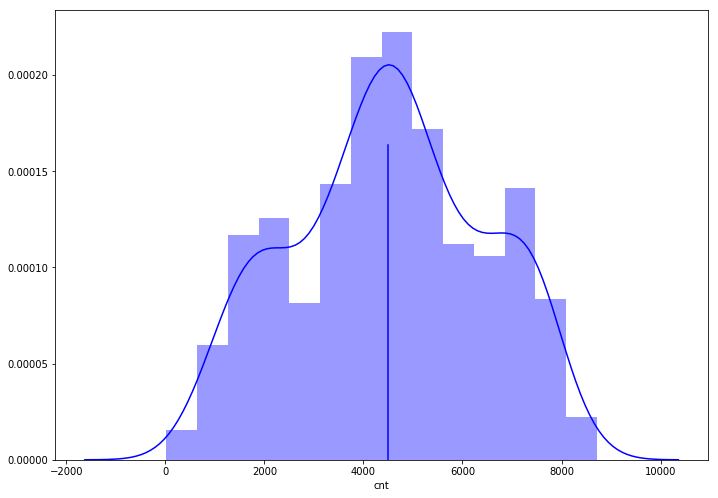

In [94]:
################################## Univariate Analysis of Numerical Variables ##########################################
#Distribution of Response Variable 'cnt'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.distplot(bike_df['cnt'], color = 'b')
ax = plt.axvline(bike_df['cnt'].mean(), 0,0.7, color='b')

from scipy.stats import kurtosis, skew
print('Cnt Skewness : ', skew(bike_df['cnt']))
print('Cnt Kurtosis : ', kurtosis(bike_df['cnt']))

#Observation : Target variable is approximately normally distributed with platykurtic curve tail ends (thin tail ends)

hum Skewness :  -0.06964015783152368
hum Kurtosis :  -0.07228631791987006
windspeed Skewness :  0.6759547264275362
windspeed Kurtosis :  0.39992023832685497


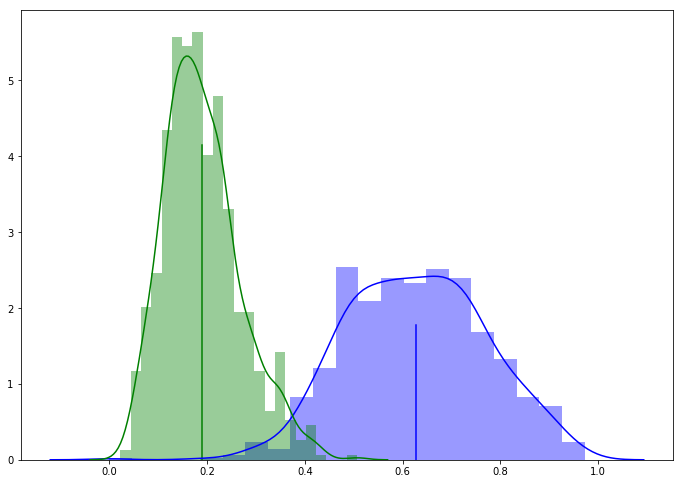

In [95]:
#Distribution of Variable 'hum','windspeed'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.axvline(bike_df['hum'].mean(), 0,0.3, color = 'b')
plt.axvline(bike_df['windspeed'].mean(), 0,0.7, color = 'g')

sns.distplot(bike_df['hum'], axlabel = False, color = 'b')
ax = sns.distplot(bike_df['windspeed'], axlabel = False, color = 'g')

print('hum Skewness : ', skew(bike_df['hum']))
print('hum Kurtosis : ', kurtosis(bike_df['hum']))

print('windspeed Skewness : ', skew(bike_df['windspeed']))
print('windspeed Kurtosis : ', kurtosis(bike_df['windspeed']))

#Observation : 

atemp Skewness :  -0.1308188980737412
atemp Kurtosis :  -0.9866019052943136
temp Skewness :  -0.05440902480571618
temp Kurtosis :  -1.1194225488473057


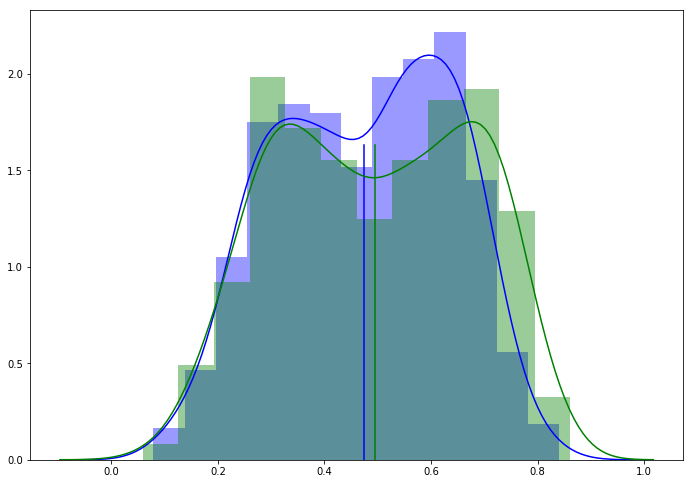

In [96]:
#Distribution of Variable 'atemp','temp'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.axvline(bike_df['atemp'].mean(), 0,0.7, color = 'b')
plt.axvline(bike_df['temp'].mean(), 0,0.7, color = 'g')

sns.distplot(bike_df['atemp'], axlabel = False, color = 'b')
ax = sns.distplot(bike_df['temp'], axlabel = False, color = 'g')

print('atemp Skewness : ', skew(bike_df['atemp']))
print('atemp Kurtosis : ', kurtosis(bike_df['atemp']))

print('temp Skewness : ', skew(bike_df['temp']))
print('temp Kurtosis : ', kurtosis(bike_df['temp']))

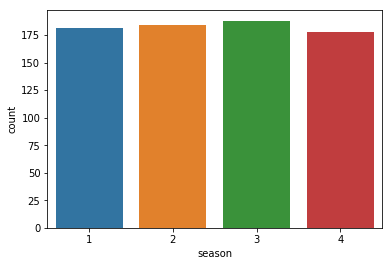

In [97]:
################################## Univarte Analysis of Categorical Variables #######################################
# Frequency Countplot for season variable
ax = sns.countplot(x='season', data=bike_df);

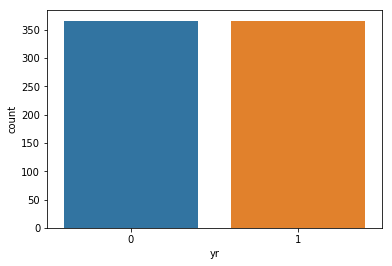

In [98]:
# Frequency Countplot for yr variable
ax = sns.countplot(x='yr', data=bike_df);

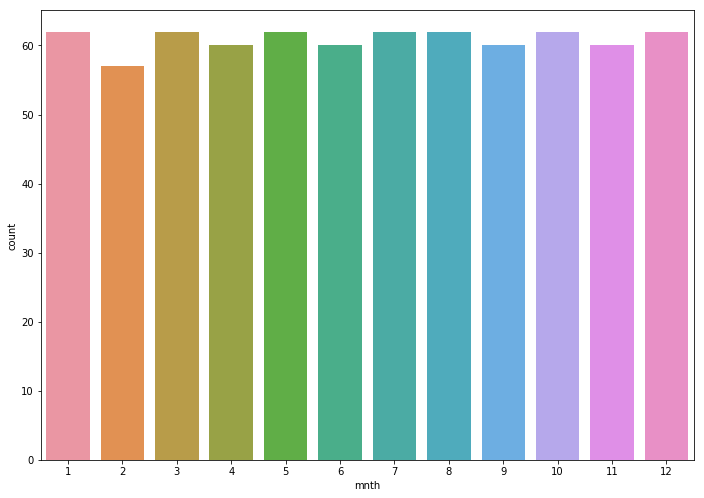

In [99]:
# Frequency Countplot for mnth variable
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(x='mnth',data=bike_df);

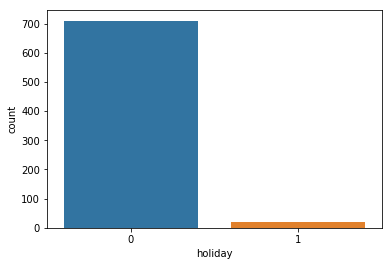

In [100]:
# Frequency Countplot for mnth variable
ax = sns.countplot(x='holiday', data=bike_df);

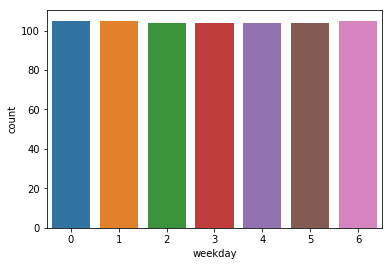

In [101]:
# Frequency Countplot for weekday variable
ax = sns.countplot(x='weekday', data=bike_df);

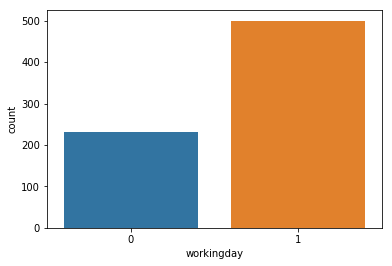

In [102]:
# Frequency Countplot for workingday variable
ax = sns.countplot(x='workingday', data=bike_df);

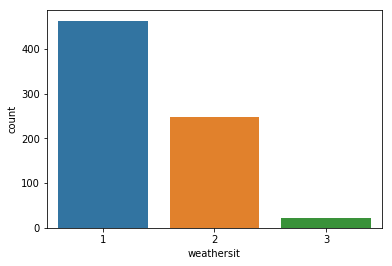

In [103]:
# Frequency Countplot for weathersit variable
ax = sns.countplot(x='weathersit', data=bike_df);

In [104]:
###################################### Central Tendency for Numerical Variables #####################################
############# Mean , Median for 'hum','windspeed','temp','atemp', 'cnt'

num_columns = ['hum','windspeed','temp','atemp', 'cnt']

for i in num_columns:
    print(i)
    print('Mean : ', bike_df[i].mean())
    print('Median : ', bike_df[i].median())
    print()

hum
Mean :  0.6278940629274962
Median :  0.626667

windspeed
Mean :  0.1904862116279068
Median :  0.180975

temp
Mean :  0.49538478850889184
Median :  0.49833299999999997

atemp
Mean :  0.47435398864569067
Median :  0.48673299999999997

cnt
Mean :  4504.3488372093025
Median :  4548.0



In [105]:
#################### Mode for Categorical Columns 'season', 'yr' , 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'
cat_columns = ['season', 'yr' , 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in cat_columns:
    print(i)
    print('Mode : ',bike_df[i].mode()[0])
    print()


season
Mode :  3

yr
Mode :  1

mnth
Mode :  1

holiday
Mode :  0

weekday
Mode :  0

workingday
Mode :  1

weathersit
Mode :  1



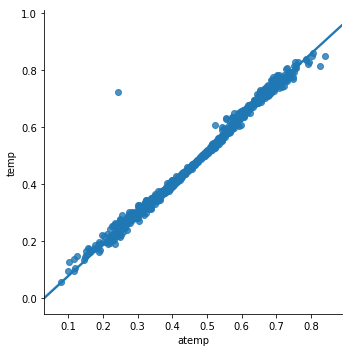

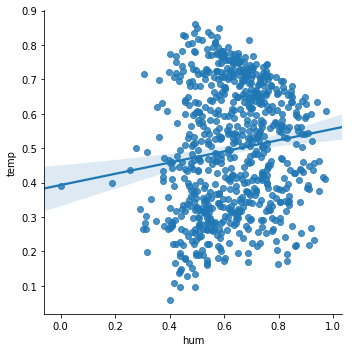

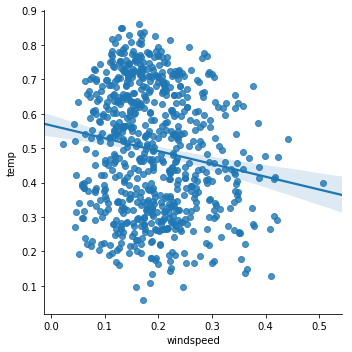

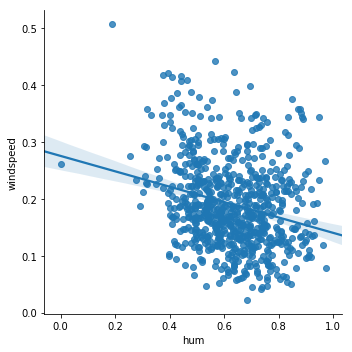

In [106]:
######################## Bivariate Analysis of Numerical Variables ################################
#Scatter plot of Variable 'atemp','temp'
ax = sns.lmplot(x="atemp", y="temp", data=bike_df);

#Scatter plot of Variable 'hum','temp'
ax = sns.lmplot(x="hum", y="temp", data=bike_df);

#Scatter plot of Variable 'windspeed','temp'
ax = sns.lmplot(x="windspeed", y="temp", data=bike_df);

#Scatter plot of Variable 'windspeed','hum'
ax = sns.lmplot(x="hum", y="windspeed", data=bike_df);


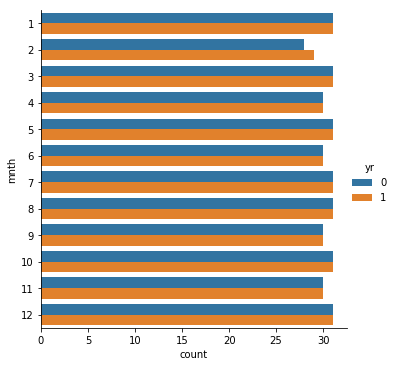

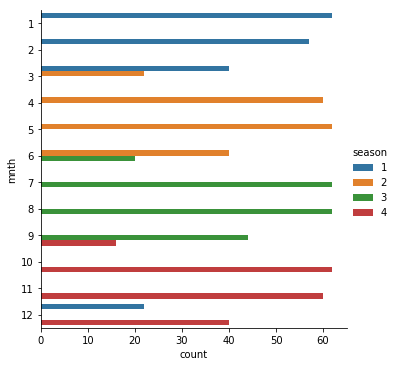

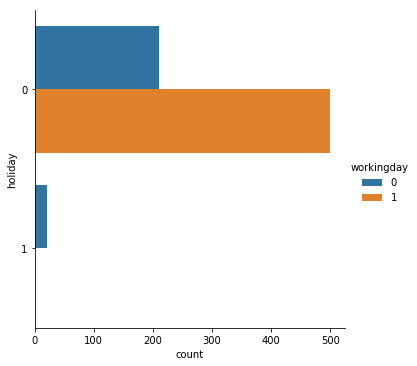

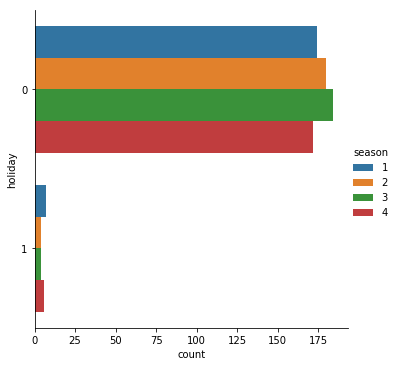

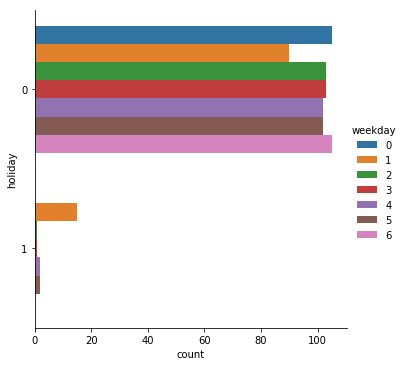

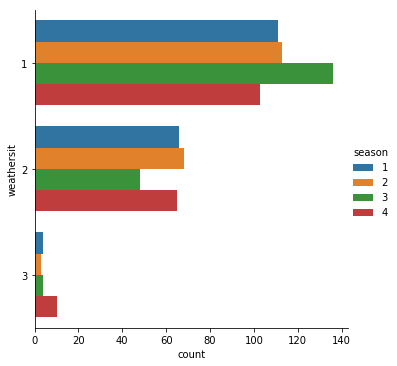

In [107]:
########################## Bivariate Analysis of Categorical Variables
# Catplot for variable 'mnth' and 'yr'
ax = sns.catplot(y='mnth', hue='yr', kind="count", data=bike_df)

# Catplot for variable 'mnth' and 'season'
ax = sns.catplot( y='mnth', hue='season', kind="count", data=bike_df)

# Catplot for variable 'holiday' and 'workingday'
ax = sns.catplot( y='holiday', hue='workingday', kind="count", data=bike_df)

# Catplot for variable 'holiday' and 'season'
ax = sns.catplot( y='holiday', hue='season', kind="count", data=bike_df)

# Catplot for variable 'holiday' and 'weekday'
ax = sns.catplot( y='holiday', hue='weekday', kind="count", data=bike_df)

# Catplot for variable 'weathersit' and 'season'
ax = sns.catplot( y='weathersit', hue='season', kind="count", data=bike_df)



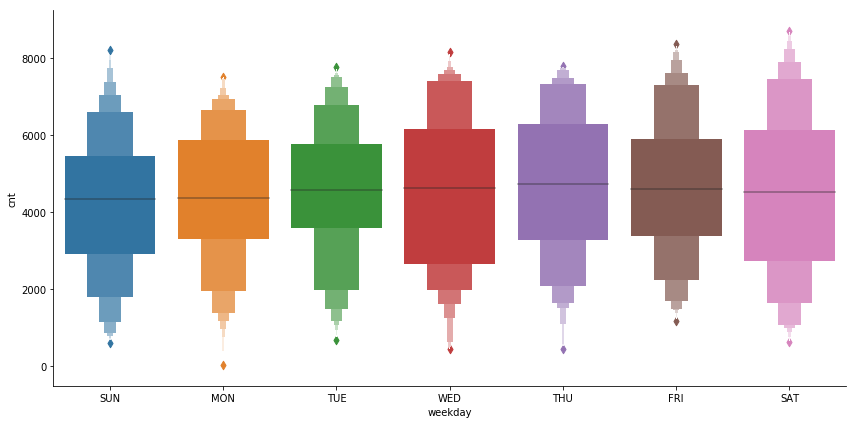

In [108]:
######## Bivariate Graphical Analysis with Dependant Variable ########

# Rental Count per Day (SUN to SAT)
ax = sns.catplot(x="weekday", y="cnt", data=bike_df.reset_index(), kind="boxen", height=6, aspect=2)
ax= ax.set_xticklabels(['SUN','MON','TUE','WED','THU','FRI','SAT'])
#Observation : For all Days, The count is almost similar and uniform (4500~ approx).

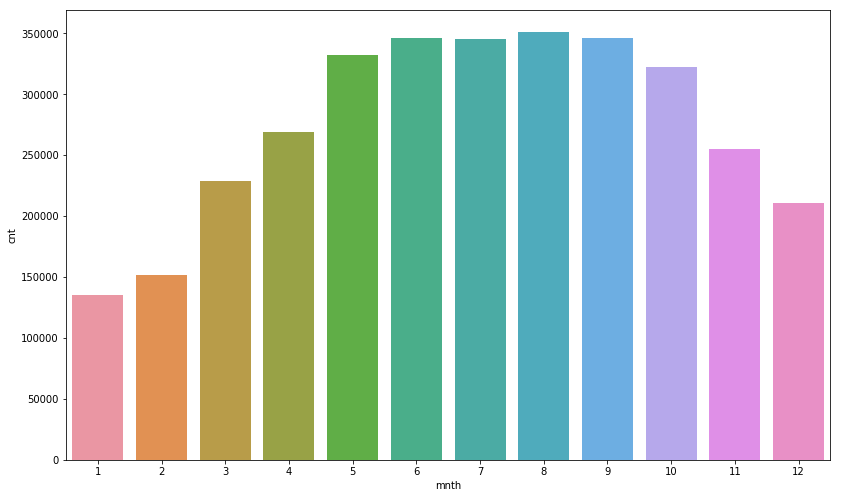

In [109]:
#Bike Rental Count on Monthly Basis
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
month_count = pd.DataFrame(bike_df.groupby(['mnth']).sum())
ax = sns.barplot(x="mnth", y="cnt",data=month_count.reset_index())

#Observation : We can see that there were less bikes rented on the month of Jan, Feb (Start of year) and also the sales peak during the mid-year


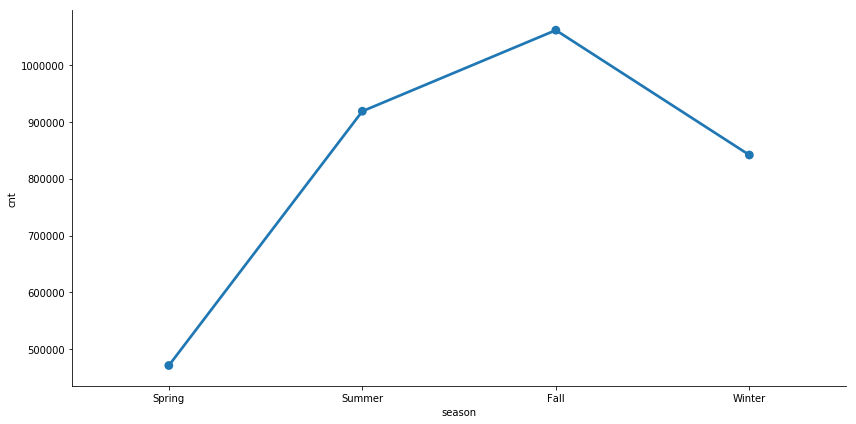

In [110]:
#Bike Rental Count on Seasonal Basis
season_count = pd.DataFrame(bike_df.groupby(['season']).sum())
#ax = sns.lineplot(x="season", y="cnt",data=season_count.reset_index())
ax = sns.catplot(x="season", y="cnt", data=season_count.reset_index(), kind="point", height=6, aspect=2)
ax = ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])

#Observation : Bike Rental counts are very high during Fall Season and very low during Spring Season.

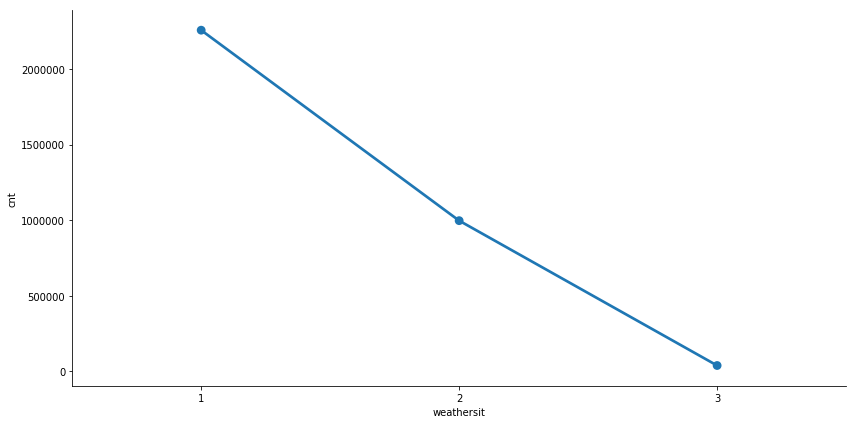

In [111]:
#Bike Rental Count on basis of Weather Type
weather_type = pd.DataFrame(bike_df.groupby(['weathersit']).sum())
ax = sns.catplot(x="weathersit", y="cnt", data=weather_type.reset_index(), kind="point", height=6, aspect=2)

#Observation : Bike Rental Counts are very high with Clear, Few clouds, Partly cloudy, Partly cloudy weather type 
#              and almost negligible with Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
#              clouds weather Type. There are no bike rentals during heavy rain.

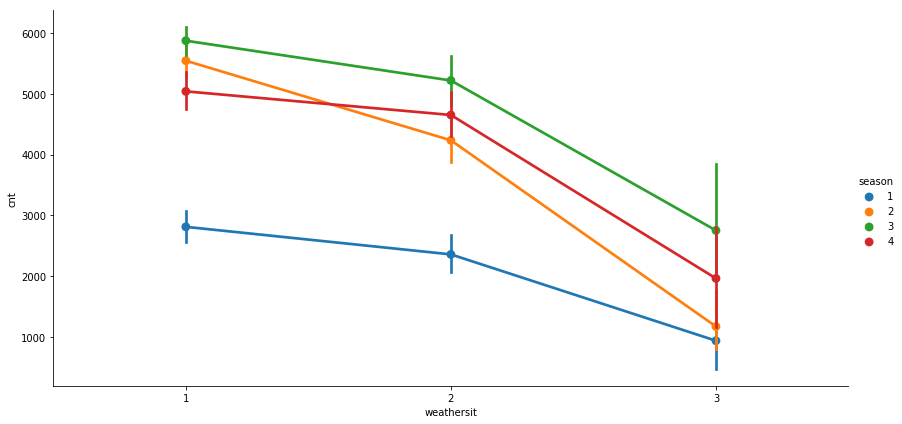

In [112]:
# Catplot for variable 'weathersit' and 'season'
ax = sns.catplot( x= "weathersit", y='cnt', hue='season', kind="point", data=bike_df, height=6, aspect=2)


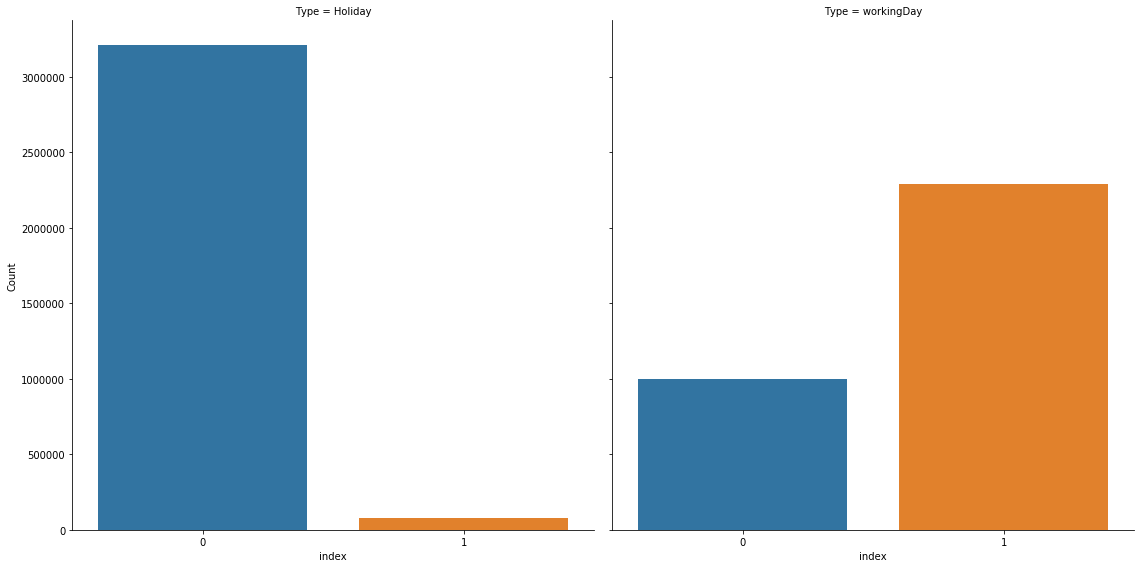

In [113]:
#Bike Rental Count on basis of Day Type (Holiday/Working Day)
holiday = pd.DataFrame(bike_df.groupby(['holiday']).sum())
holiday = pd.DataFrame({'Count' : holiday['cnt'], 'Type':'Holiday'})
workingday = pd.DataFrame(bike_df.groupby(['workingday']).sum())
workingday = pd.DataFrame({'Count' : workingday['cnt'], 'Type':'workingDay'})
#df = pd.concat([holiday.reset_index(drop=True), workingday], axis = 1) 
df = holiday.append(workingday, sort=False)
# ax = sns.lineplot(data=df.Holiday_count, color="g")
# ax2 = plt.twinx()
# ax = sns.lineplot(data=df.working_count, color="b", ax=ax2)

ax = sns.catplot(x="index", y="Count", data=df.reset_index(), col="Type", kind="bar", height=8, aspect=1)

#Observation : Bikes are rented more on Non-Holiday's and compartively more on working day (excluding weekends)

## Feature Selection

In [114]:
##Correlation analysis
#Correlation plot
cnames = ['hum','windspeed','temp','atemp','casual','registered','cnt']
df_corr = bike_df.loc[:,cnames]

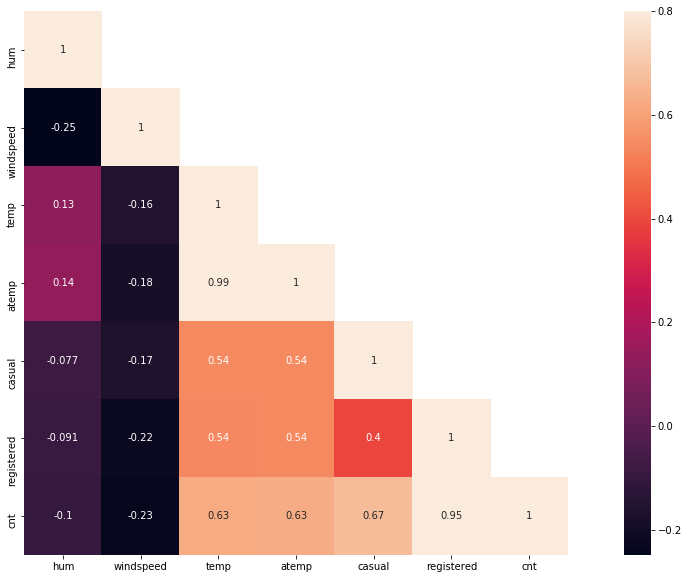

In [115]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(20, 10))

#Generate correlation matrix
corr = df_corr.corr()

#Plot heatmap using seaborn library
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
ax = sns.heatmap(corr, mask=mask, vmax=.8, square=True, annot=True, ax=ax)


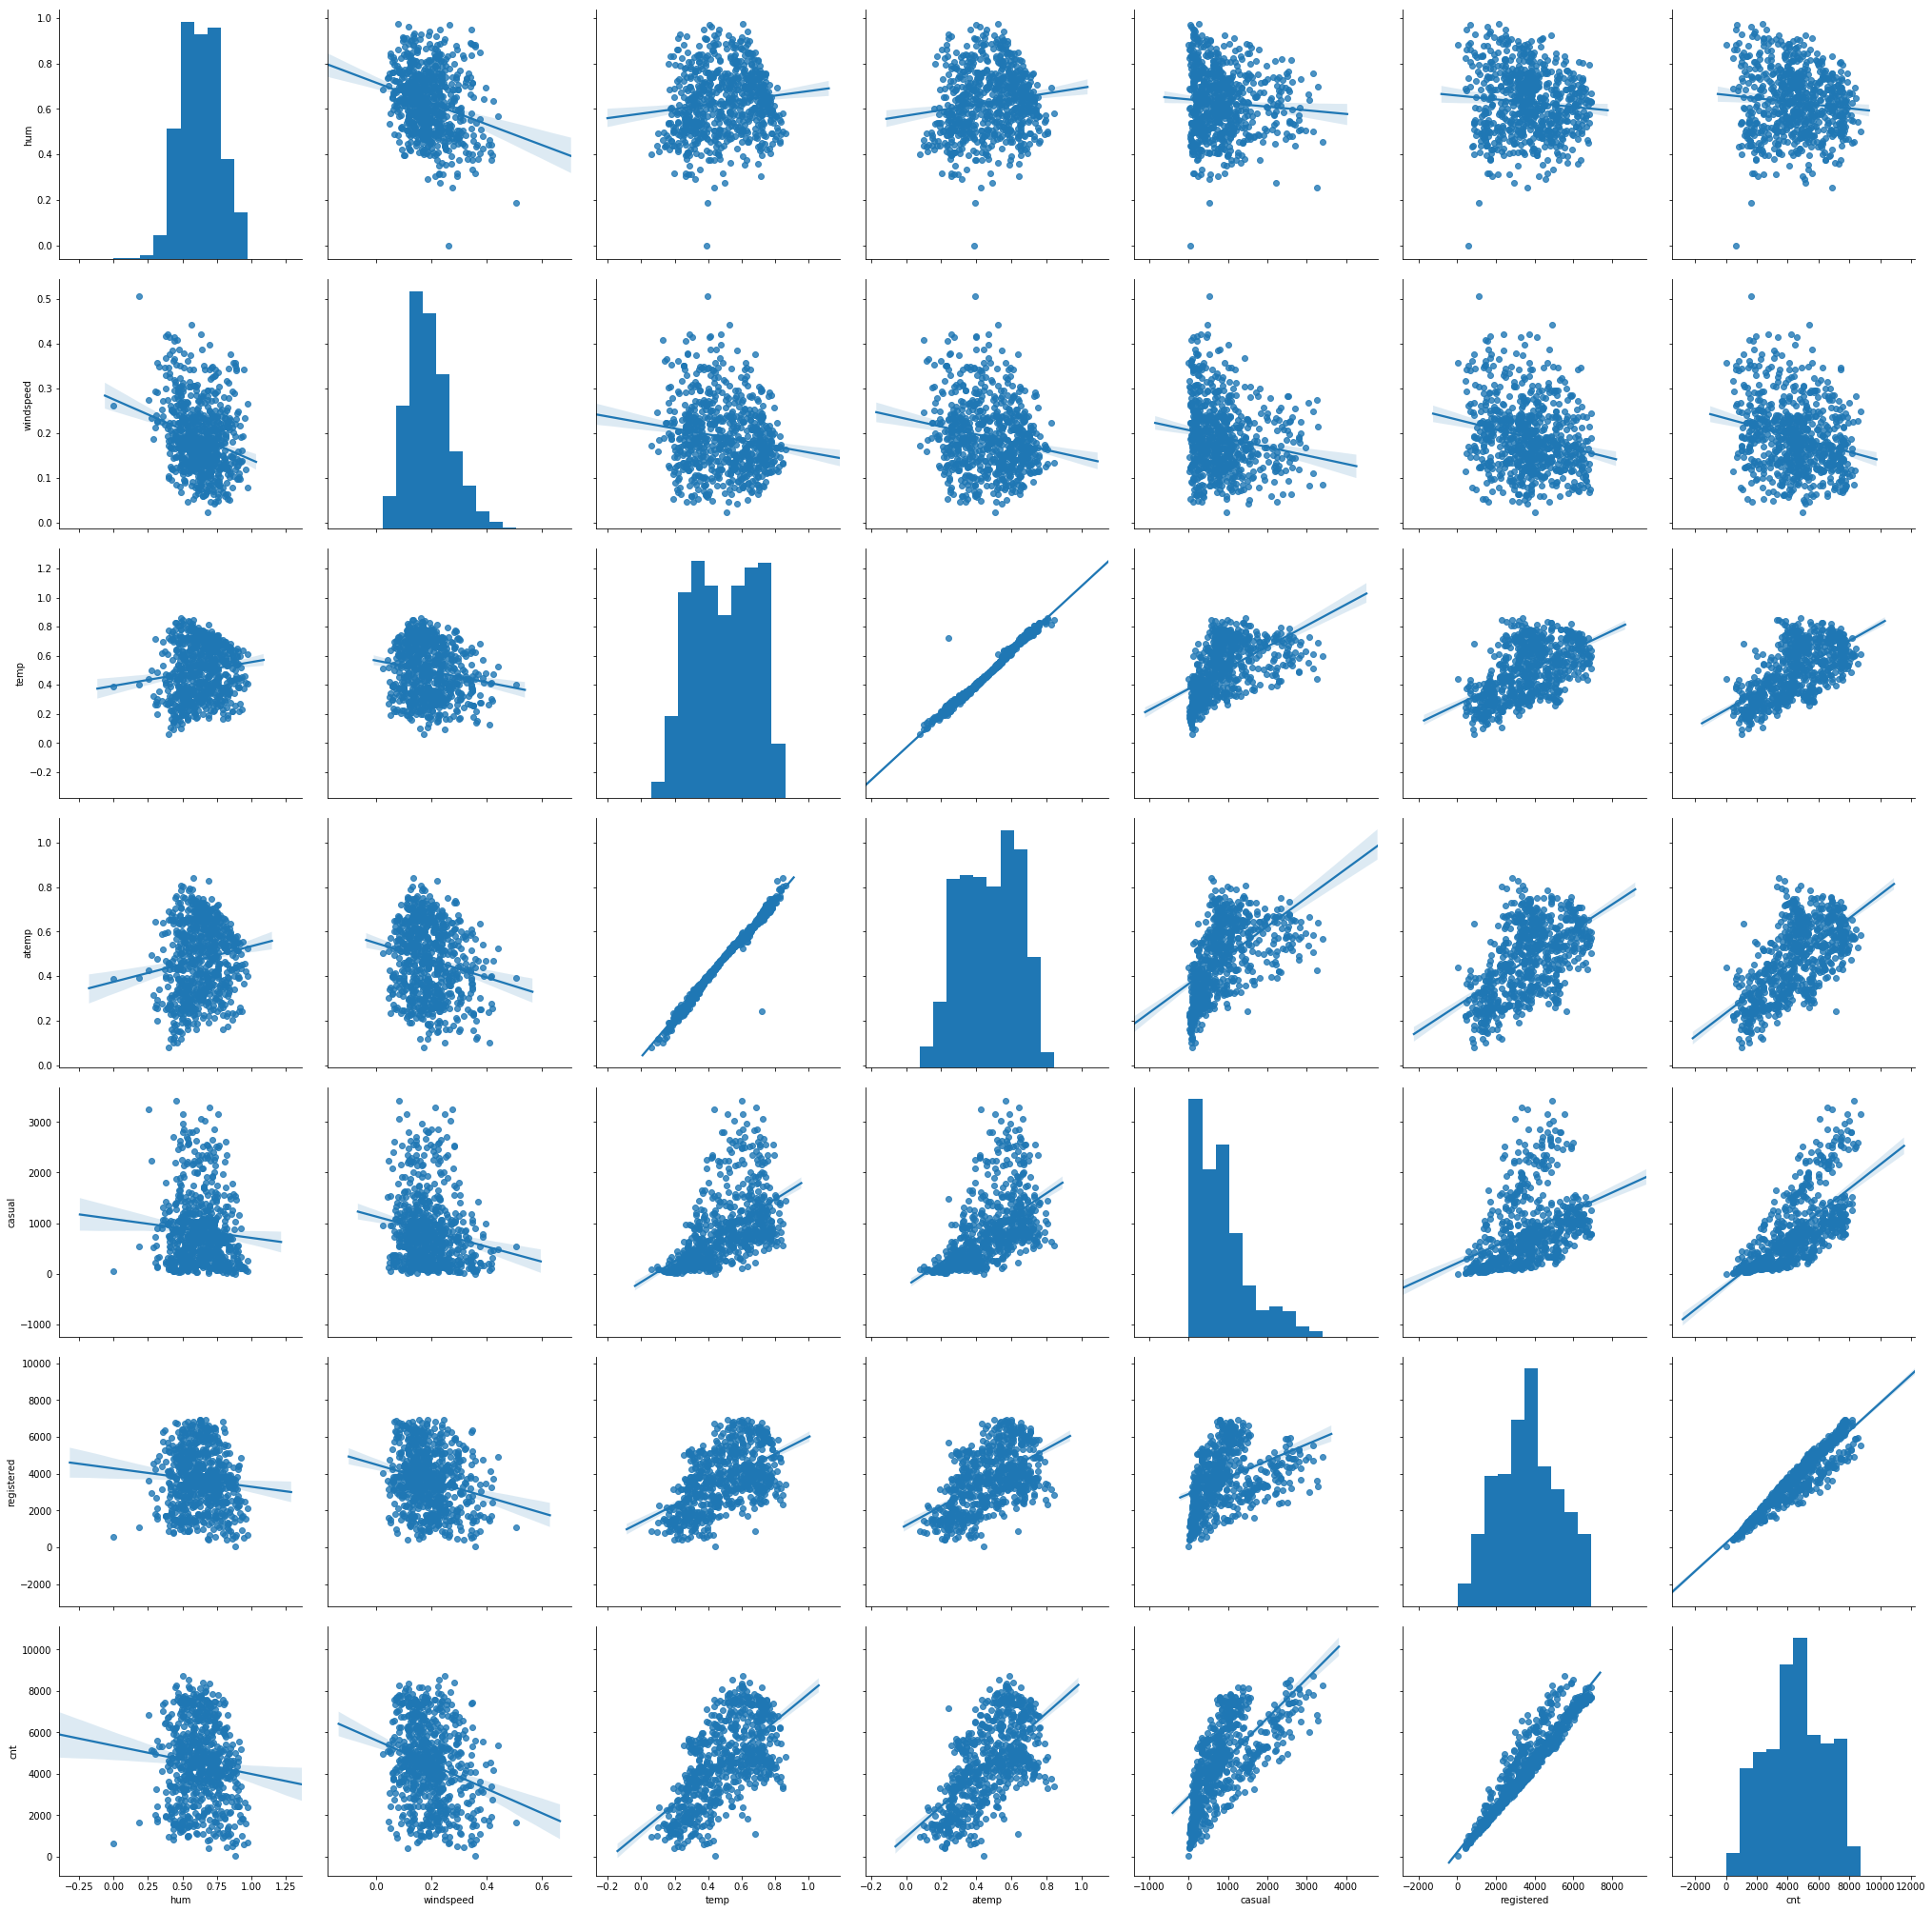

In [116]:
ax = sns.pairplot(df_corr[cnames], height = 4, kind="reg")


In [117]:
################################## Dropping Varibales ####################################

#'atemp' since it shows alot of correlation with 'temp' variable
#'casual' and 'registered' since its aggregation sum results to 'cnt' and we have to predict 'cnt' using other important aspects
#'dteday' since it doesnt help in prediction and also we have covered all the necessary factors in 'season','yr','mnth'

bike_df = bike_df.drop(['atemp','casual','registered','dteday'], axis=1)

## Outlier Analysis

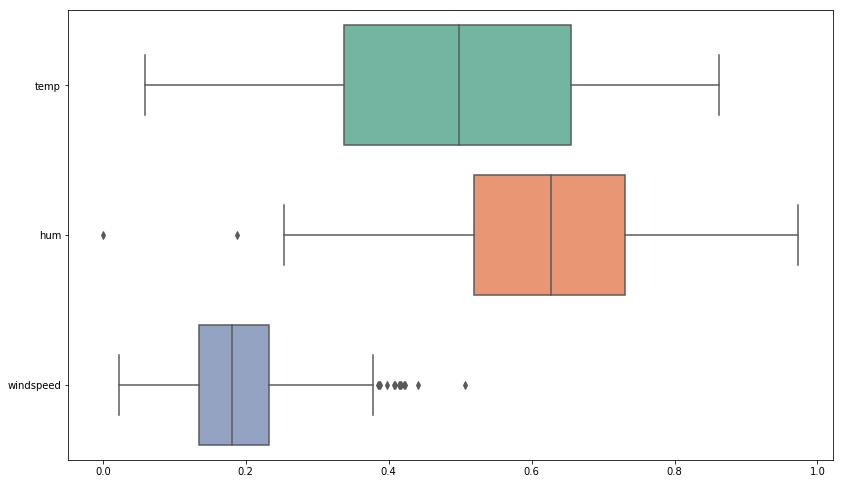

In [118]:
#Outlier Analysis for all numeric variables present in the data
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
ax = sns.boxplot(data=bike_df.iloc[:,7:10], orient="h", palette="Set2")

#Observation : There are outliers present in the 'hum' and 'windspeed' variable and hence we need to treat them.


In [119]:
# Columns to Check for outliers
cnames = ['hum','windspeed','temp']

for i in cnames:
    q75, q25 = np.percentile(bike_df.loc[:,i], [75,25])
    
    iqr = q75 - q25
    
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    
    bike_df.loc[bike_df.loc[:,i] < min ,:i ] = np.nan
    bike_df.loc[bike_df.loc[:,i] > max ,:i ] = np.nan
    
## Calculating Missing values
#missing_val_boxplot = pd.DataFrame(bike_df.isnull().sum())
#print(missing_val_boxplot)

## KNN Apply for the dataset
bike_df = pd.DataFrame(KNN(k=3).complete(bike_df), columns=bike_df.columns)

### Again Converting into appropriate datatypes
for i in category_column_names :
    bike_df[i] = bike_df[i].astype('int')
    bike_df[i] = bike_df[i].astype('category')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


Imputing row 1/731 with 0 missing, elapsed time: 0.162
Imputing row 101/731 with 0 missing, elapsed time: 0.164
Imputing row 201/731 with 0 missing, elapsed time: 0.167
Imputing row 301/731 with 0 missing, elapsed time: 0.169
Imputing row 401/731 with 0 missing, elapsed time: 0.169
Imputing row 501/731 with 0 missing, elapsed time: 0.174
Imputing row 601/731 with 0 missing, elapsed time: 0.174
Imputing row 701/731 with 0 missing, elapsed time: 0.176


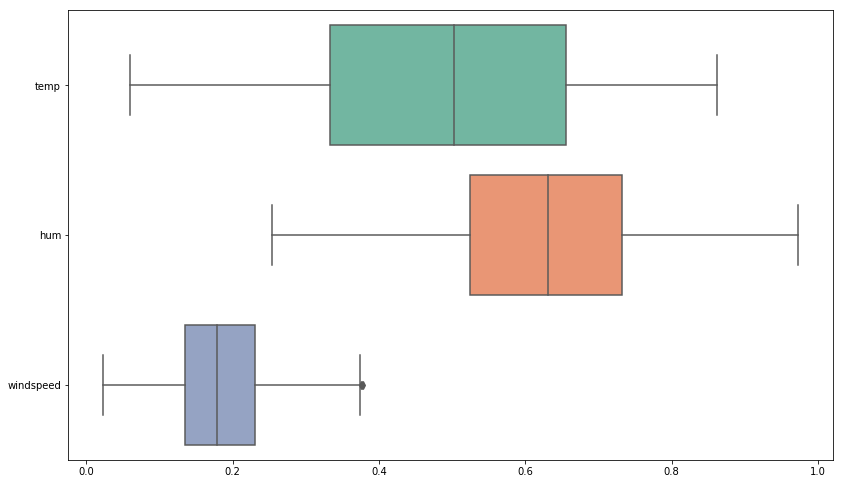

In [120]:
#Outlier Analysis for all numeric variables present in the data
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 8.27)
ax = sns.boxplot(data=bike_df.iloc[:,7:10], orient="h", palette="Set2")

#Observation : All the Outliers are removed.

In [121]:
##################### One hot Encoding #####################
# Encoding Categorical Data
cat_columns = ['season', 'mnth', 'weekday', 'weathersit']
bike_df = pd.get_dummies(bike_df, columns=cat_columns)


In [122]:
#### Avoiding Dummy Variable Trap by removing one
bike_df = bike_df.drop(['season_0','mnth_1','weekday_0','weathersit_0'],axis=1)

for i in range(0, bike_df.shape[1]):
    if(bike_df.iloc[:,i].dtypes == "uint8"):
        bike_df.iloc[:,i] = bike_df.iloc[:,i].astype('category')


In [123]:
#### Reordering the columns so 'cnt' gets to last column
cols = list(bike_df.columns.values)
cols.remove('cnt')
cols.insert(len(cols), 'cnt')
bike_df = bike_df[cols]

## Model Development

In [124]:
## Divide the dataset into train and test
X = bike_df.values[:, 0:30]
Y = bike_df.values[:,30]

In [125]:
#Split Data into Training and Test Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=100)

In [126]:
## Build the Decision Tree
from sklearn.metrics import accuracy_score
C50_model = DecisionTreeRegressor(max_depth = 8, min_samples_split = 4).fit(X_train, Y_train)

In [127]:
C50_model

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [128]:
C50_reg_predictions = C50_model.predict(X_test)

In [129]:
## Calculate MAPE 
def MAPE(y_act, y_pred):
    mape = np.mean(np.abs((y_act - y_pred)/ y_act))*100
    return mape

## Calculate RMSE
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    rmse=np.sqrt(mse)
    return rmse

## Calculate Accuracy
def ACCURACY(mape):
    accuracy = abs(100 - np.mean(mape))
    return accuracy

MAPE :  19.040277194371217
RMSE :  936.2372321476415
Accuracy: 80.96 %.


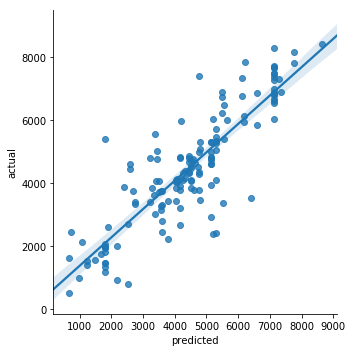

In [130]:
#################### Error Metrics for Decision Tree #############################
# Calcuate and display MAPE
mape_decision_tree = MAPE(Y_test, C50_reg_predictions)
print("MAPE : ",mape_decision_tree)

# Calcuate and display RMSE
rmse_decision_tree = RMSE(Y_test, C50_reg_predictions)
print("RMSE : ", rmse_decision_tree)

# Calculate and display accuracy
accuracy = ACCURACY(mape_decision_tree)
print('Accuracy:', round(accuracy, 2), '%.')

#Comparison Dataframe
decision_tree_eval = pd.DataFrame({'predicted':C50_reg_predictions, 'actual': Y_test})

#Scatter plot of Actual vs Predicted for Decision Tree
ax = sns.lmplot(x="predicted", y="actual", data=decision_tree_eval);

In [131]:
################################# Random Forest Implementation #####################################
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators = 1000)
RF_model.fit(X_train, Y_train);

In [132]:
RF_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [133]:
# Use the forest's predict method on the test data
RF_predictions = RF_model.predict(X_test)

MAPE :  14.195060862197229
RMSE :  682.9632235944755
Accuracy: 85.8 %.


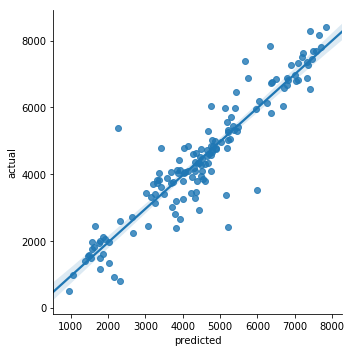

In [134]:
############################ Error Metrics for Random Forest ################
# Calculate and display MAPE
mape_random_forest = MAPE(Y_test, RF_predictions)
print("MAPE : ",mape_random_forest)

# Calculate and display RMSE
rmse_random_forest = RMSE(Y_test, RF_predictions)
print("RMSE : ", rmse_random_forest)

#Calculate and display accuracy
accuracy = ACCURACY(mape_random_forest)
print('Accuracy:', round(accuracy, 2), '%.')

#Comparison Dataframe for Random Forest
randomforest_eval = pd.DataFrame({'predicted':RF_predictions, 'actual': Y_test})

#Scatter plot of Actual vs Predicted for Decision Tree
ax = sns.lmplot(x="predicted", y="actual", data=randomforest_eval);

In [135]:
############################### Linear Regression #########################################
# Fitting Multiple Linear Regression in the Training Set
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor = linear_regressor.fit(X_train , Y_train) #Linear_Regression.LineOfBestFit(Independant Variable, Dependant variable)

In [136]:
linear_regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
#Predict using Linear Regressor
linear_predictions = linear_regressor.predict(X_test)

In [138]:
#Get Linear Regression Equation along with Co-efficients
pd.DataFrame(zip(bike_df.columns, linear_regressor.coef_.tolist()), columns=['Names', 'Coefficients'])

,Names,Coefficients
0,yr,1988.038039
1,holiday,-752.820463
2,workingday,-127.216356
3,temp,4729.747114
4,hum,-1530.268933
5,windspeed,-3332.685656
6,season_1,-630.640945
7,season_2,237.523009
8,season_3,-125.538537
9,season_4,721.790501


MAPE :  20.749633184576798
RMSE :  872.0697751160301
Accuracy: 79.25 %.


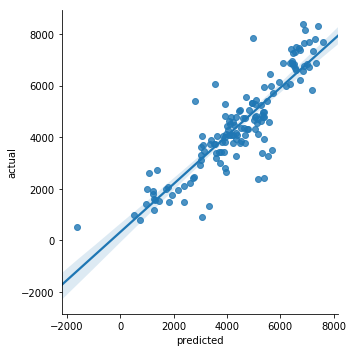

In [139]:
########################### Error Metrics for Linear Regression #########################
# Calculate and display MAPE
mape_linear = MAPE(Y_test, linear_predictions)
print("MAPE : ",mape_linear)

# Calculate and display RMSE
rmse_linear = RMSE(Y_test, linear_predictions)
print("RMSE : ", rmse_linear)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape_linear)
print('Accuracy:', round(accuracy, 2), '%.')

#Comparison Dataframe for Linear Regression
linear_eval = pd.DataFrame({'predicted':linear_predictions, 'actual': Y_test})

#Scatter plot of Actual vs Predicted for Linear Regression
ax = sns.lmplot(x="predicted", y="actual", data=linear_eval);

In [140]:
############################### Tuning Linear Regression ##################################

### New Ordianry Least Squared Object for creating Linear Regressor from statsmodels
import statsmodels.formula.api as asm
## Building Model with all predictors


X_opt = X
X_opt = np.array(X_opt, dtype=float)
Y = np.array(Y, dtype=float)

regressor_OLS = asm.OLS(endog = Y, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     981.4
Date:                Tue, 05 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:38:42   Log-Likelihood:                -5886.8
No. Observations:                 731   AIC:                         1.183e+04
Df Residuals:                     702   BIC:                         1.196e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2008.7061     59.236     33.910      0.000    1892.405    2125.007
x2          -870.3255    309.019     -2.816      0.005   -1477.037    -263.614
x3          -218.3351    260.233     -0.839      0.402    -729.264     292.593
x4          4628.8870    415.233     11.148      0.000    3813.639    5444.135
x5         -1661.6754    305.193     -5.445      0.000   -2260.876   -1062.475
x6         -2714.8530    436.720     -6.216      0.000   -3572.286   -1857.420
x7          -128.5934    136.705     -0.941      0.347    -396.993     139.806
x8           778.4917    182.028      4.277      0.000     421.108    1135.876
x9           701.0133    193.705      3.619      0.000     320.703    1081.323
x10         1252.4206    178.990      6.997      0.000     901.001    1603.840
x11          208.5998    145.126      1.437      0.151     -76.333     493.532
x12          524.5865    168.109      3.121      0.002     194.530     854.643
x13          435.2311    250.899      1.735      0.083     -57.371     927.833
x14          692.9560    270.446      2.562      0.011     161.976    1223.936
x15          449.5688    282.523      1.591      0.112    -105.123    1004.260
x16          -31.4937    310.410     -0.101      0.919    -640.937     577.950
x17          373.8591    298.285      1.253      0.210    -211.778     959.497
x18          992.2663    261.973      3.788      0.000     477.923    1506.610
x19          735.2268    238.317      3.085      0.002     267.326    1203.127
x20          171.7486    220.540      0.779      0.436    -261.247     604.745
x21           92.2478    182.427      0.506      0.613    -265.921     450.416
x22          440.7901    270.427      1.630      0.104     -90.152     971.732
x23          525.5397    276.721      1.899      0.058     -17.760    1068.840
x24          579.3687    278.938      2.077      0.038      31.716    1127.022
x25          619.4685    276.454      2.241      0.025      76.694    1162.243
x26          607.8192    269.790      2.253      0.025      78.127    1137.512
x27          453.0077    108.295      4.183      0.000     240.387     665.628
x28         1665.0260    143.625     11.593      0.000    1383.039    1947.013
x29         1211.5607    173.008      7.003      0.000     871.886    1551.236
x30         -273.2545    262.159     -1.042      0.298    -787.964     241.455
==============================================================================
Omnibus:                      123.069   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.512
Skew:                          -0.835   Prob(JB):                     4.68e-77
Kurtosis:                       5.958   Cond. No.                     2.25e+15
==============================================================================

W

In [141]:
#Predict using Linear Regressor
OLS_predictions = regressor_OLS.predict(X_test)

# Calculate and display MAPE
mape_OLS = MAPE(Y_test, OLS_predictions)
print("MAPE : ",mape_linear)

# Calculate and display RMSE
rmse_OLS = RMSE(Y_test, OLS_predictions)
print("RMSE : ", rmse_linear)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape_OLS)
print('Accuracy:', round(accuracy, 2), '%.')


MAPE :  20.749633184576798
RMSE :  872.0697751160301
Accuracy: 80.97 %.


In [142]:
# Let's try XGboost algorithm to see if we can get better results
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=1000, booster='gbtree', learning_rate=0.05, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7, nthread=3)


In [143]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=3, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [144]:
xgb_predictions = xgb.predict(X_test)


MAPE :  12.927487078677105
RMSE :  682.2968442684705
Accuracy: 87.07 %.


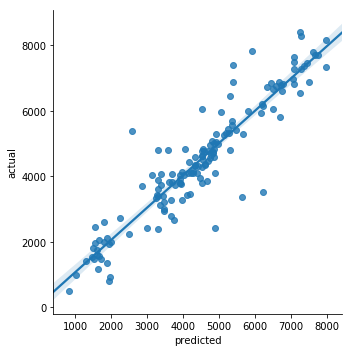

In [145]:
################################ Error Metrics for XGBoost ###########################
# Calculate and display MAPE
mape_xgb = MAPE(Y_test, xgb_predictions)
print("MAPE : ",mape_xgb)

# Calculate and display RMSE
rmse_xgb = RMSE(Y_test, xgb_predictions)
print("RMSE : ", rmse_xgb)

# Calculate and display accuracy
accuracy_xgb = 100 - np.mean(mape_xgb)
print('Accuracy:', round(accuracy_xgb, 2), '%.')

#Comparison Dataframe for MultiLinear OLS regression
xgboost_eval = pd.DataFrame({'predicted':xgb_predictions, 'actual': Y_test})

#Scatter plot of Actual vs Predicted for MultiLinear OLS regression
ax = sns.lmplot(x="predicted", y="actual", data=xgboost_eval)

In [146]:
###### Conclusion : With Accuracy approximately 87% , XGBoost Works much better for our dataset